In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [3]:
def handleRate(val):
    val = str(val).split('/')
    val = val[0];
    return float(val)
df['rate'] = df['rate'].apply(handleRate)
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'type of resturant')

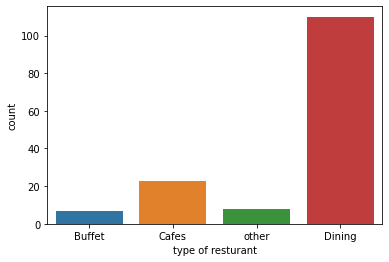

In [5]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of resturant')

# Conclusion: majority of the resturant falls in dinning category

Text(0, 0.5, 'Votes')

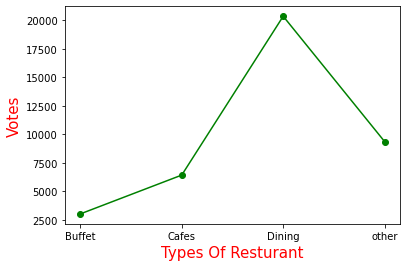

In [8]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Types Of Resturant', c='red', size=15)
plt.ylabel('Votes', c='red', size=15)

# conclusion: dinning resturants has recieved maximum votes

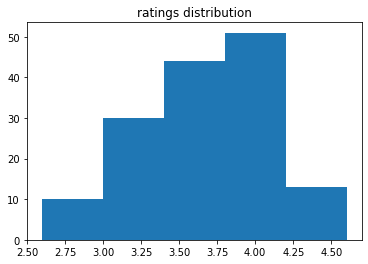

In [9]:
plt.hist(df['rate'], bins=5)
plt.title('ratings distribution')
plt.show()

# conclusion: the majority resturants recieve ratings from 3.5 to 4

Text(0.5, 0, 'couple spending category')

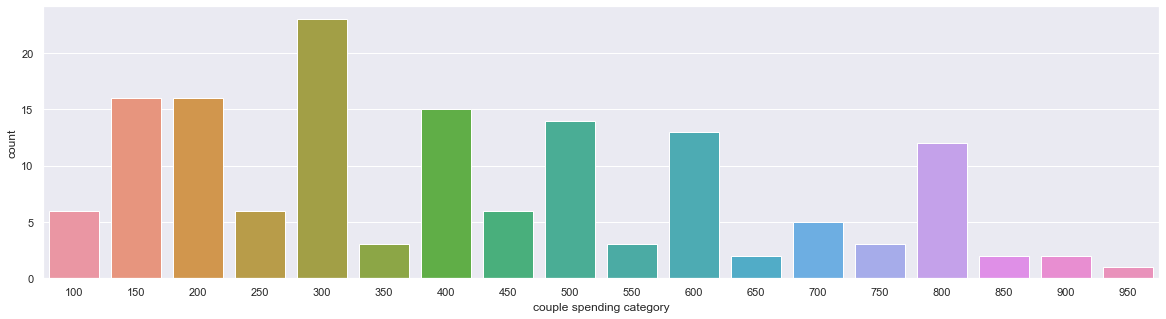

In [23]:
sns.countplot(x=df['approx_cost(for two people)'])
sns.set(rc={'figure.figsize':(20,5)})
plt.xlabel('couple spending category')

# conclusion: the majority of couples prefer resturants with an approx. cost of 300 rupees

<AxesSubplot:xlabel='online_order', ylabel='rate'>

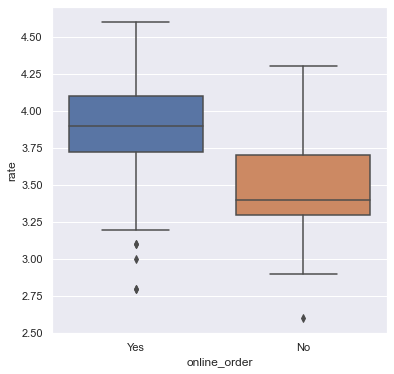

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y = 'rate', data=df)

# conclusion: offline orders recieve lower ratings in comparison to online orders

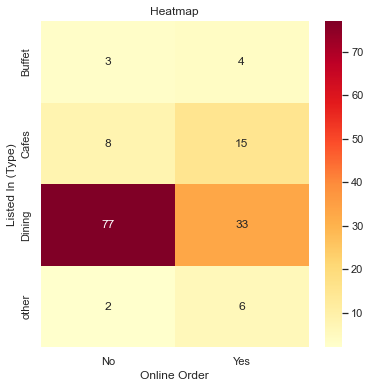

In [34]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

# conclusion: dinning resturants primarily accept offline orders whereas cafes primarily accept online orders. This suggests that clients preferably orders in person at resturants but prefer online ordering at cafes. 